

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Entrega 2- Segmentación, extracción de características y análisis PCA </p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>23 de mayo de 2022</p>

In [10]:
# Librerias
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats as st
from scipy.cluster import vq


## 2. Estudio, Evaluación y discusión del desempeño de las redes neuronales Artificiales como clasificador


In [11]:
# importación de características y datos de procesamiento
Xpoblacional=np.load('../data/caracteristicasNormalizadasPCA.npy')
imagenesProcesadas=np.load('../data/listaImagenesProcesadas.npy')
print(f'Imágenes procesadas:\n {imagenesProcesadas}')
nombreCaracteristicas=np.load('../data/nombreCaracteristicasNormalizadasPCA.npy')
print(f'Nombre de características finales\n{nombreCaracteristicas}')

Imágenes procesadas:
 ['monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia' 'monilia'
 'monilia' 'monilia' 'monilia' 'fito' 'fito' 'fito' 'fito' 'fito' 'fito'
 'fito' 'fito' 'fito' 'fito' 'saludable' 'saludable' 'saludable'
 'saludable' 'saludable' 'saludable' 'saludable' 'saludable' 'saludable'
 'saludable']
Nombre de características finales
['Moda R' 'Moda G' 'Moda B' 'Moda Gris' 'Media R' 'Media G' 'Media B'
 'Media Gris' 'mínimo R' 'mínimo G' 'mínimo B' 'mínimo Gris' 'máximo R'
 'máximo G' 'máximo B' 'máximo Gris' 'Momento HU 1' 'Momento HU 2'
 'Momento HU 3' 'Momento HU 4' 'Momento HU 5' 'Momento HU 6'
 'Momento HU 7' 'Redondez']


In [12]:
# Orden de las imágenes seleccionadas

n_monilia=10 # Número de monilias procesadas
n_monilia_entrenamiento=7 # Número de monilias elegidas para entrenar


n_fito=10 # ...
n_fito_entrenamiento=7 # ...


n_saludable=10
n_saludable_entrenamiento=7

n_total=n_monilia+n_fito+n_saludable

X = np.array([], float)
Y = np.array([], int)

Xprueba=np.array([], float)
Yprueba= np.array([], int)

for contador in range(n_total):
    # X.shape
    #print(X.shape)
    if contador>=n_monilia+n_fito and contador<n_monilia+n_fito+n_saludable_entrenamiento :
        # Se eligen las saludables
        #print(f'saludable {contador}')
        X=np.append(X,Xpoblacional[contador])       
        Y=np.append(Y,0)

    elif contador>=n_monilia and contador<n_monilia+n_fito_entrenamiento :
        # Se eligen las fito
        #print(f'fito {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)


    elif contador<n_monilia_entrenamiento:
        # Se eligen las monilias
        #print(f'monilia {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)

    else:
        Xprueba=np.append(Xprueba,Xpoblacional[contador])
        
        if contador>=n_monilia+n_fito+n_saludable_entrenamiento:
            # saludable
            Yprueba=np.append(Yprueba,0)


        elif contador>=n_monilia+n_fito_entrenamiento:
            # Fito
            Yprueba=np.append(Yprueba,1)

        elif contador>=n_monilia_entrenamiento:
            # monilia
            Yprueba=np.append(Yprueba,1)


# Redimencionamiento
X.shape=(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento,Xpoblacional.shape[1])
Xprueba.shape=(n_total-(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento),Xpoblacional.shape[1])

# Comprobación 
# Se comparan las primeras y últimas características de las selecciondadas y las totales
if(np.all(X[0]==Xpoblacional[0]) and np.all(X[n_monilia_entrenamiento-1]==Xpoblacional[n_monilia_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[0]}')

if(np.all(X[n_monilia_entrenamiento]==Xpoblacional[n_monilia]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento-1]==Xpoblacional[n_monilia+n_fito_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia]}')

if(np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento]==Xpoblacional[n_monilia+n_fito]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento-1]==Xpoblacional[n_monilia+n_fito+n_saludable_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia+n_fito]}')

print(f'X.shape: {X.shape}')
print(f'Y.shape: {Y.shape}')

print(f'Xprueba.shape: {Xprueba.shape}')
print(f'Yprueba.shape: {Yprueba.shape}')
print(f'Salidas de entrenamiento {Y}')
print(f'Salidas de prueba {Yprueba}')


Se importaron bien las monilia
Se importaron bien las fito
Se importaron bien las saludable
X.shape: (21, 24)
Y.shape: (21,)
Xprueba.shape: (9, 24)
Yprueba.shape: (9,)
Salidas de entrenamiento [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
Salidas de prueba [1 1 1 1 1 1 0 0 0]


En esta ocasión se va a clasificar si el cacao está o no enfermo. Si está enfermo la salida es 1 y si está sano la salida es 0.

### Entrenamiento con el perceptrón

Las siguientes líneas de código permiten encontrar el peso y bias.

In [13]:
def entrenamientoPerceptron(X,y,interaciones):
    
    '''  
    X: Vector de características n_imagenes X m_características
    y: Vector de resultados 1Xn_imagenes
    interaciones: Número de iteraciones
    '''

    # Se le inserta al vector X una columna de unos al final
    X=np.insert(X, X.shape[1], 1,axis=1)


    # Se inicializa el vector de pesos y el bias
    np.random.seed(1)
    W = np.random.random((X.shape[1])) - 1
    
    n_caracteristicas=X.shape[1]-1
    W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas
    y=y.T

    interacionesFinales=0
    
    for j in range(interaciones):
        
        Nerrors = 0
        #=========================
        #PASO 2
        for m in range(X.shape[0]):
            net = np.dot(X[m],W)
            
        #=========================
        #PASO 3
            if net > 0: y_cal = 1
            else: y_cal = 0
        #=========================
        #PASO 4
            error = y[m] - y_cal
            Delta = error*X[m]
            # update weights
            W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
            W = W + Delta
            W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas

            # print(f'Época: {j+1}\ncaracterística: {m+1}')
            # print(f'W: {W}\n')

            if error != 0: 
                Nerrors = Nerrors+1
        
        interacionesFinales=j+1

        if Nerrors == 0: 
            break
        #===========================================
        #===========================================

    W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
    return [W,interacionesFinales]

iteraciones=500
finalW,epocas=entrenamientoPerceptron(X,Y,iteraciones)

print(f'W: {finalW[:X.shape[1]]}')
print(f'b: {finalW[X.shape[1]]}')
print(f'Épocas: {epocas}')

W: [-59.44964466  16.9948343   33.61972222  57.07096002 -53.37506301
  -1.01711325  -7.97601905 -16.77034389  -0.59931096  -0.4572617
  -0.57688392  -0.31085893  -0.92103795   1.73694097   2.51758367
  14.06654594  44.60064371  39.33409043 -44.6914274  -43.08619893
  -2.61710419 -27.81742083   1.2216507  -35.18708888]
b: 0.876389152296038
Épocas: 460


Mediante un perceptrón se demoró 460 épocas en entrenarse. Lo importante fue que se logró tener un número de convergencia. Ahora, se pasa a analizar los resultados con las características de prueba.

In [14]:
# resultados
Yevaluacion=np.array([], int)

# Se le inserta al vector Xprueba una columna de unos al final

Xevaluacion=np.insert(Xprueba, Xprueba.shape[1], 1,axis=1)
n_caracteristicas=Xevaluacion.shape[1]-1

# El vector de  pesos y el bias fue el que se obtuvo en el entrenamiento
Wevaluacion=finalW


Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]*n_caracteristicas


for m in range(Xevaluacion.shape[0]):
    net = np.dot(Xevaluacion[m],Wevaluacion)
    
    if net > 0: Yevaluacion=np.append(Yevaluacion,1) 
    else: Yevaluacion=np.append(Yevaluacion,0)

Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]/n_caracteristicas

print(f'Yevaluacion final: {Yevaluacion}')

Yevaluacion final: [0 1 1 1 1 1 1 0 0]


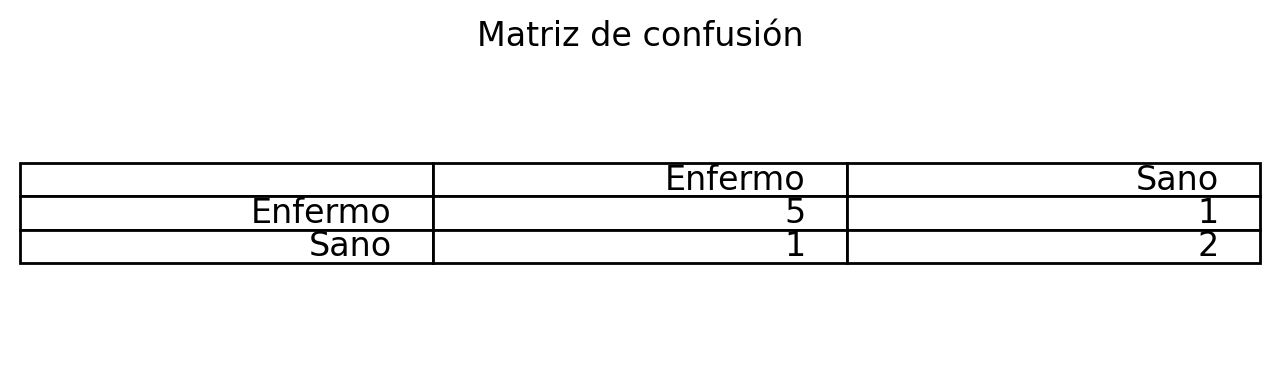

In [31]:
# Matriz ce confusión [rrr4],[rrr5]

VA=0 # Veradadera aceptación
FN=0 # Falsa negación
FA=0 # Falsa aceptación
VR=0 # Verdadero rechazo

for i in range(len(Yprueba)):

    if Yprueba[i]==1 and Yevaluacion[i]==1:
        VA+=1
    
    elif Yprueba[i]==1 and Yevaluacion[i]==0:
        FN+=1
    
    elif Yprueba[i]==0 and Yevaluacion[i]==1:
        FA+=1
    
    else:
        VR+=1
        
FR=FN # Falso rechazo    


fig = plt.figure(dpi=200,figsize=(8,2))
ax = fig.add_subplot(1,1,1)
table_data=[
    ['', 'Enfermo','Sano'],
    ['Enfermo', VA,FN],
    ['Sano', FA,VR]]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(12)
ax.axis('off')
ax.set_title('Matriz de confusión')
plt.show()

#### Valores estadísticos

A continuación se presentan los valores estadísticos

In [16]:
EM=(FA+FR)/len(Xprueba)
print(f'Error medio: {EM}')

Precision=VA/(VA+FA)
print(f'Precisión: {Precision}')

sensibilidad=VA/(VA+FR)
print(f'Sensibilidad: {sensibilidad*100} %')

especificidad=VR/(VR+FA)
print(f'Especificidad: {especificidad*100} %')

print(f'Proporción de falsa aceptación: {(1-especificidad)*100} %')

Exactitud=(VA+VR)/len(Xprueba)
print(f'Exactitud: {Exactitud*100} %')


Error medio: 0.2222222222222222
Precisión: 0.8333333333333334
Sensibilidad: 83.33333333333334 %
Especificidad: 66.66666666666666 %
Proporción de falsa aceptación: 33.333333333333336 %
Exactitud: 77.77777777777779 %


La exactitud fue cercana al 80% y en general es un buen resultado para obtenerse con un perceptrón.

### Entrenamiento con adaline



In [55]:
def funAdaline(X,y,a,errorMaximo,iteracionesMaximas):
    '''  
    X: Características n_imagenesxm_caracteristicas
    y: Vector deseado 1xm_características
    a: Constante de aprendizaje 0.1<a<1
    errorMaximo: (valor deseado-valor obtenido)^2/2<errorMaximo
    iteracionesMaximas: Máximas iteraciones
    '''
    
    # Adaptada de [rrr1]
    #A countinuación se presenta el proceso iterativo de todos los pasos descritos para ADALINE
    # MUCHAS ITERACIONES
    
    np.random.seed(1)
    W = 0.02*np.random.random((X.shape[1])) - 1

    j = 0
    iteraciones=0
    while j == 0:
        Merror = 0
        for m in range(X.shape[0]):
            y_cal = np.dot(X[m],W)
        #=========================
        #PASO 3
            error = y[m] - y_cal
            Delta = a * error * X[m] 
        #=========================
        #PASO 4
            # update weights
            W = W + Delta
            Merror = Merror + np.absolute(error)
        if Merror < errorMaximo: 
            j = 1
        elif iteraciones>=iteracionesMaximas:
            j=1

        iteraciones+=1
        #===========================================
        #===========================================

    print(j)
    print(f'iteraciones: {iteraciones}')
    print(f'error: {Merror/X.shape[0]}')
    # print (f"W: {W}")

    return [W,Merror/X.shape[0]]

a=0.01
errorMaximo=0.1
iteracionesMaximas=1000
W_funAdaline,errorP_funAdaline=funAdaline(X,Y,a,errorMaximo,iteracionesMaximas)



1
iteraciones: 1001
error: 0.21074483072632066


In [64]:
## Evaluación de resultado

Yevaluacion=np.array([], int)

for m in range(Xprueba.shape[0]):
    y_cal = np.dot(Xprueba[m],W_funAdaline)

    if y_cal>errorP_funAdaline:
        Yevaluacion=np.append(Yevaluacion,1)
    else:
        Yevaluacion=np.append(Yevaluacion,0) 



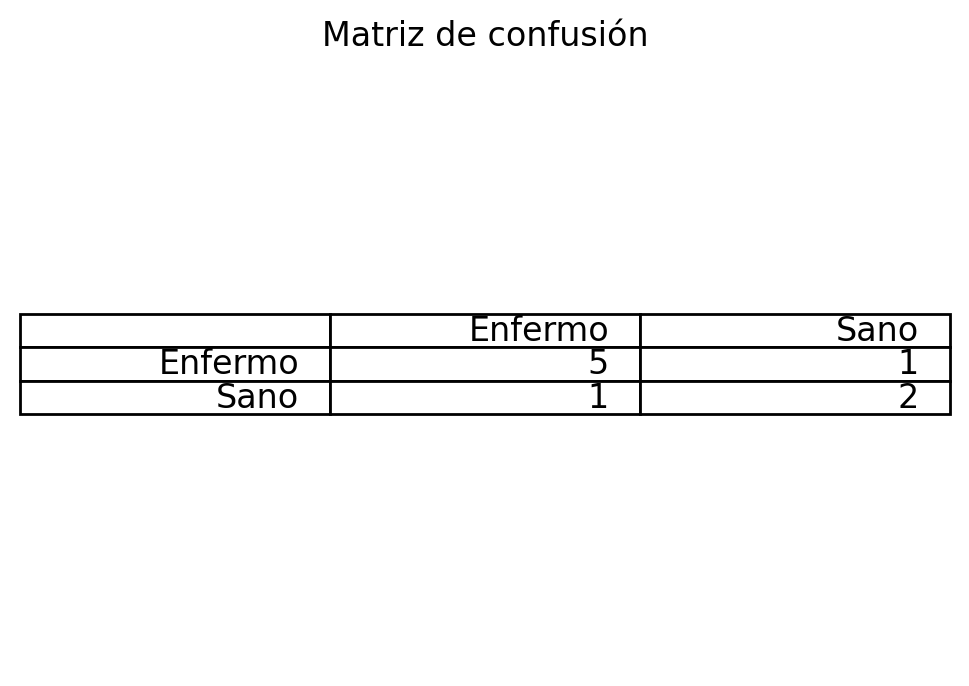

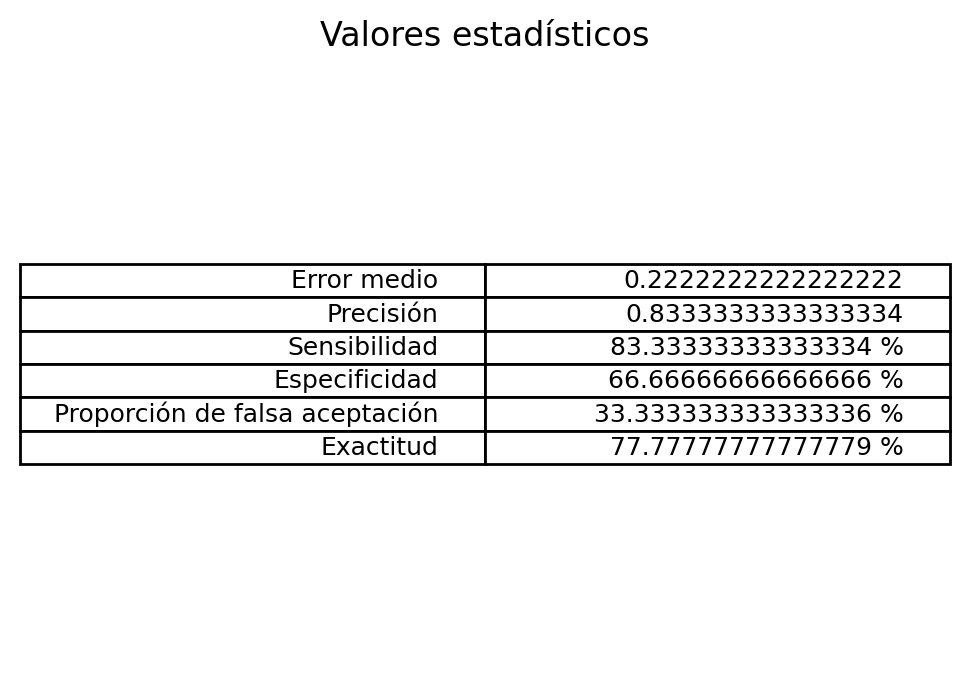

In [75]:
## Matriz de confusión y valores estadísticos 

def matrizConfusion(Yprueba,Yevaluacion):

    '''  
    Yprueba: Resultados de verderos
    Yevaluacion: Resultados de evaluación
    '''

    # Matriz ce confusión [4],[5]

    VA=0 # Veradadera aceptación
    FN=0 # Falsa negación
    FA=0 # Falsa aceptación
    VR=0 # Verdadero rechazo

    for i in range(len(Yprueba)):

        if Yprueba[i]==1 and Yevaluacion[i]==1:
            VA+=1
        
        elif Yprueba[i]==1 and Yevaluacion[i]==0:
            FN+=1
        
        elif Yprueba[i]==0 and Yevaluacion[i]==1:
            FA+=1
        
        else:
            VR+=1
            
    FR=FN # Falso rechazo    



    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)
    table_matrizConfusion=[
        ['', 'Enfermo','Sano'],
        ['Enfermo', VA,FN],
        ['Sano', FA,VR]]
    table = ax.table(cellText=table_matrizConfusion, loc='center',rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Matriz de confusión')

    plt.show()

    return [VA,FA,FR,VR]


def valoresEstadisticos(Yprueba,VA,FA,FR,VR):
    '''   
    Yprueba: Vector de resultados de prueba. 
    VA: Verdadera aceptación 
    FA: Falsa aceptación 
    FR: Falso rechazo 
    VR: Verdadero rechazo
    '''

    # Cálculo de valores estadísticos
    EM=(FA+FR)/len(Yprueba)

    Precision=VA/(VA+FA)
  

    sensibilidad=VA/(VA+FR)


    especificidad=VR/(VR+FA)
 
    Exactitud=(VA+VR)/len(Yprueba)
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)

    table_valoresEstadisticos=[
    ['Error medio', EM],
    ['Precisión',Precision],
    ['Sensibilidad',f'{sensibilidad*100} %'],
    ['Especificidad',f'{especificidad*100} %'],
    ['Proporción de falsa aceptación',f'{(1-especificidad)*100} %'],
    ['Exactitud',f'{Exactitud*100} %']]

    table = ax.table(cellText=table_valoresEstadisticos, loc='center',
    rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Valores estadísticos')

    plt.show()


[VA_adaline,FA_adaline,FR_adaline,VR_adaline]=matrizConfusion(Yprueba,Yevaluacion)
valoresEstadisticos(Yprueba,VA_adaline,FA_adaline,FR_adaline,VR_adaline)




Los resultados fueron los mismos que los obtenidos con el perceptrón pero con mayores cálculos.